In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def reconstructe(signal,top=3):
    n_samples = len(signal)
    t = np.linspace(0, 1, n_samples)
    fft_result = np.fft.fft(signal)
    frequencies_fft = np.fft.fftfreq(len(signal), 1 / n_samples)
    fft_abs = np.abs(fft_result)
    non_negative_indices = np.where(frequencies_fft >= 0)[0]  # 非负频率的索引
    top_indices = np.argsort(fft_abs[non_negative_indices])[-top:]  # 最大的 3 个幅度的索引
    top_freqs = frequencies_fft[top_indices]  # 对应的频率
    top_fft_values = fft_result[top_indices]
    top_amps = fft_abs[top_indices]  # 对应的幅度
    reconstructed_signal = np.sum([amp * np.cos(2 * np.pi * freq * t) + amp * np.sin(2 * np.pi * freq * t) for freq, amp in zip(top_freqs, top_amps)], axis=0) / n_samples
    return reconstructed_signal




# 绘制重建信号和原始信号
def _plot(signal,reconstructed_signal):
    n_samples = len(signal)
    t = np.linspace(0, 1, n_samples)
    plt.plot(t, reconstructed_signal, 'b-.')
    plt.plot(t, signal, 'r')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Reconstructed Signal')
    plt.legend(['Reconstructed Signal', 'Original Signal'])
    plt.show()


In [152]:


# 信号频率和幅度信息
frequencies = [10, 20, 30]
amplitudes = [1, 0.5, 0.3]
n_samples = 1000  # 信号样本数

# 时间点
t = np.linspace(0, 1, n_samples)

# 合成信号
signal = np.zeros_like(t)
for freq, amp in zip(frequencies, amplitudes):
    signal += amp * np.sin(2 * np.pi * freq * t) 
signal+=np.random.rand((n_samples))/10

In [153]:
reconstructed_signal = reconstructe(signal)

In [154]:
data = pd.read_csv('./ETTm2.csv')
real_ot = data["OT"].values
ot = (real_ot-real_ot.mean())/real_ot.std()
start_i = 10
in_len = 96
out_len = 96
seq_in = ot[start_i:start_i+in_len]
seq_target = ot[start_i+in_len:start_i+in_len+out_len]

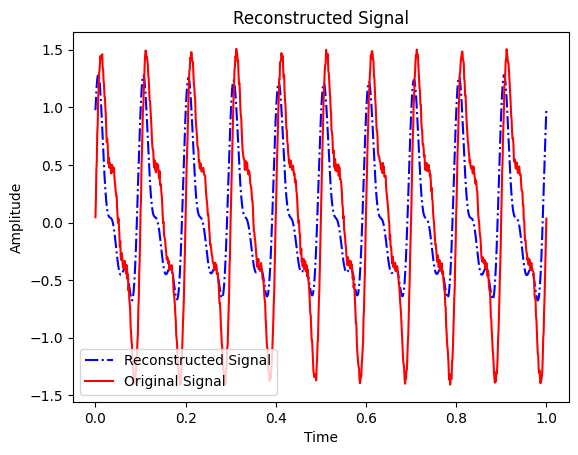

In [155]:
reconstructed_signal = reconstructe(signal,top=10)
_plot(signal,reconstructed_signal)